# **Financial Institutions Consumer Complaints**

---
Authors: [Teofilo Ligawa Gafna](https://github.com/teofizzy), [Marjorie Opiyo](https://github.com/Opiyow), [Daniel Kimutai](https://github.com/danielkimutai), [Kinyanjui Kamau](https://github.com/K1nyash), [James Mponzi](https://github.com/Mponziii)

# 2. Data Understanding
> In this stage, the study shall seek to understand the attributes of the data.

The Consumer Complaint Database is a compilation of complaints submitted to businesses asking them to address consumer financial goods and services. Complaints are publicized after the business responds and verifies a business relationship with the customer or after 15 days, whichever happens first. The Consumer Complaint Database does not include complaints that have been forwarded to other regulators, such as those regarding depository institutions with less than $10 billion in assets.

## 2.1 Data Description

## 2.2 Load the Data
> In this stage we loaded the data.

In [175]:
# Loading dependencies

# data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly


# Natural language processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.collocations import *
import string
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import unidecode
from word2number import w2n
import contractions
from nltk.tokenize import RegexpTokenizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# saving models
import pickle

In [43]:
# Loading the data
def load_data(filename:str):
    """ A function that loads data"""
    output = pd.read_csv(filename)
    return output
data = load_data('data/complaints.csv')

# previewing the data
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-12-04,Checking or savings account,Other banking product or service,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",RI,2832.0,NaN,Other,Web,2022-12-04,Closed with explanation,Yes,NaN,6277013
1,2022-12-09,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",TX,79928.0,NaN,NaN,Web,2022-12-09,In progress,Yes,NaN,6300442
2,2022-12-09,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30103.0,NaN,NaN,Web,2022-12-09,In progress,Yes,NaN,6300444
3,2022-12-09,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Problem with personal statement of dispute,NaN,NaN,"EQUIFAX, INC.",PA,19104.0,NaN,NaN,Web,2022-12-09,In progress,Yes,NaN,6300449
4,2022-12-04,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,33167.0,NaN,Other,Web,2022-12-04,Closed with explanation,Yes,NaN,6274454


In [44]:
# Previewing the tail
data.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3147565,2017-02-09,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt resulted from identity theft,I have disputed my debts several times with no...,NaN,Bonneville Billing and Collections,UT,84054.0,Servicemember,Consent provided,Web,2017-02-09,Closed with explanation,Yes,No,2334969
3147566,2015-04-29,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,My father died in XX/XX/XXXX. Left me his only...,NaN,"CITIBANK, N.A.",OK,74066.0,NaN,Consent provided,Web,2015-04-29,Closed with explanation,Yes,No,1352738
3147567,2017-03-31,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,cfbp i would Like to file a complaint on Exper...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MN,55379.0,NaN,Consent provided,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,2412926
3147568,2017-01-16,Credit reporting,NaN,Incorrect information on credit report,Account status,My husband and I are in the middle of an FHA S...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30215.0,NaN,Consent provided,Web,2017-01-16,Closed with explanation,Yes,No,2292586
3147569,2018-03-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,91304.0,NaN,NaN,Referral,2018-03-08,Closed with explanation,Yes,NaN,2837068


## 2.3 Preliminary Data Inspection

In [45]:
## Checking the data summary

# Checking the dimensions of the data
print(f"This data has {data.shape[0]} rows and {data.shape[1]} columns")
print()
# summary
data.info()

This data has 3147570 rows and 18 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147570 entries, 0 to 3147569
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtyp

### 2.3.1 Observations:
* The columns `Date received` and `Date sent to company` have been registered as object which is basic pandas for string yet they should be date_time objects.
* Every other data type looks okay.
* From the summary above, we could note that the data has 3147570 rows and 18 columns.
* There is only one numeric column - `Complaint ID`. This column in unnecessarily integer because it is a unique identifier of the consumer.

* The other columns are objects, which is pandas for string.

In [46]:
# Creating a class to check missing values
class understanding(object):
    """ This is a class that checks for missing values"""
    def __init__(self):
        pass
    
    def miss_no(df):
        """ A function that counts the missing values per column"""
        return df.isna().sum()
   
    def percent_missing(df):
        """ A function that calculates the percentage of the column that is missing"""
        return df.isna().sum() / len(df)
    def check_dup(df):
        """ A function that checks for duplicates in the data"""
        return df.duplicated().sum()
    
    def counts(df, col):
        """ A function that finds the value counts of a column"""
        return df[col].value_counts()
    
    def num_unique(df, col):
        """A function that finds the number of unique elements in  a column"""
        return df[col].nunique()
    
    def get_unique(df, col):
        """ A function that shows the unique values in a column"""
        return df[col].unique()

In [47]:
# missing values
understand = understanding

# The number of missing values per column
understand.miss_no(data)

Date received                         0
Product                               0
Sub-product                      235293
Issue                                 0
Sub-issue                        685381
Consumer complaint narrative    2015226
Company public response         1774590
Company                               0
State                             40190
ZIP code                          40631
Tags                            2792441
Consumer consent provided?       826205
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2379130
Complaint ID                          0
dtype: int64

In [48]:
# Percentage of missing values per column
understand.percent_missing(data)

Date received                   0.000000
Product                         0.000000
Sub-product                     0.074754
Issue                           0.000000
Sub-issue                       0.217749
Consumer complaint narrative    0.640248
Company public response         0.563797
Company                         0.000000
State                           0.012769
ZIP code                        0.012909
Tags                            0.887174
Consumer consent provided?      0.262490
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000001
Timely response?                0.000000
Consumer disputed?              0.755862
Complaint ID                    0.000000
dtype: float64

There are a number of missing values in the data. Most notably, the columns with a high percentage of missing values are:
* `Consumer complaint narrative` - 64 %.
* `Company public response` - 56 %.
* `Tags` - 89 %.
* `Consumer disputed?` - 76%.

In [49]:
# The number of duplicated rows in the data
understand.check_dup(data)

0

There are no duplicates in the data.

### 2.3.2 Checking Selected Columns

#### 2.3.2.1 `Consumer  disputed?`

In [50]:
# Checking the value counts of the column 'Consumer disputed?'
understand.counts(data, 'Consumer disputed?')

No     620062
Yes    148378
Name: Consumer disputed?, dtype: int64

This is a binary variable

The classes seem to be imbalanced with a significant difference in the value counts of the classes.

#### 2.3.2.2 `Timely response?`

In [51]:
# Checking the value counts of the column 'Timely response?'
understand.counts(data, 'Timely response?')

Yes    3097148
No       50422
Name: Timely response?, dtype: int64

This is a binary variable.

The classes seem to be imbalanced with a significant difference in the value counts of the classes.

#### 2.3.2.3 `Company response to consumer`

In [52]:
# Checking the value counts of the column 'Company response to consumer'
understand.counts(data, 'Company response to consumer')

Closed with explanation            2429039
Closed with non-monetary relief     474084
Closed with monetary relief         123817
In progress                          70517
Closed without relief                17868
Closed                               17611
Untimely response                     9326
Closed with relief                    5304
Name: Company response to consumer, dtype: int64

This column is a multi class column.

The classes seem to be imbalanced with a significant difference in the value counts of the classes.

#### 2.3.2.4 `Submitted via`

In [53]:
# Checking the value counts of the 'Submitted via'
understand.counts(data, 'Submitted via')

Web             2649097
Referral         237715
Phone            147848
Postal mail       86339
Fax               25660
Web Referral        487
Email               424
Name: Submitted via, dtype: int64

This column is a multi class column.

The classes seem to be imbalanced with a significant difference in the value counts of the classes.

#### 2.3.2.5 `Product`

In [54]:
# Product
understand.counts(data, 'Product')

Credit reporting, credit repair services, or other personal consumer reports    1469228
Debt collection                                                                  455016
Mortgage                                                                         366006
Credit card or prepaid card                                                      167334
Checking or savings account                                                      143480
Credit reporting                                                                 140429
Credit card                                                                       89190
Bank account or service                                                           86206
Student loan                                                                      71858
Money transfer, virtual currency, or money service                                48365
Vehicle loan or lease                                                             37604
Consumer Loan                   

#### 2.3.2.6 `Sub-product`

In [55]:
# Sub-product
understand.counts(data, 'Sub-product')

Credit reporting                              1452711
Checking account                               172737
General-purpose credit card or charge card     127050
I do not know                                   99542
Other mortgage                                  86635
                                               ...   
Credit repair                                     102
Traveler’s/Cashier’s checks                        88
Transit card                                       37
Student prepaid card                               26
Electronic Benefit Transfer / EBT card             12
Name: Sub-product, Length: 76, dtype: int64

#### 2.3.2.7 `Issue`

In [56]:
# Issue value counts
understand.counts(data, 'Issue')

Incorrect information on your report                                                772860
Problem with a credit reporting company's investigation into an existing problem    393166
Improper use of your report                                                         278791
Attempts to collect debt not owed                                                   154126
Loan modification,collection,foreclosure                                            112309
                                                                                     ...  
Property was sold                                                                        9
Lender damaged or destroyed vehicle                                                      8
Lender sold the property                                                                 7
Property was damaged or destroyed property                                               6
Lender damaged or destroyed property                                                     3

#### 2.3.2.8 `Sub-issue`

In [57]:
# Sub issue value counts
understand.counts(data, 'Sub-issue')

Information belongs to someone else                                                 496049
Their investigation did not fix an error on your report                             212930
Reporting company used your report improperly                                       176426
Credit inquiries on your report that you don't recognize                             99760
Account status incorrect                                                             90651
                                                                                     ...  
Was signed up for overdraft on card, but don't want to be                                6
Insurance terms                                                                          6
Problem with a credit reporting company's investigation into an existing problem         3
Improper use of your report                                                              1
Credit monitoring or identity theft protection services                                  1

There are a number of columns that look like they provide similiar information, such as:
* Product and Sub-product
* Issue and Sub-issue

# 3. Data Preparation
> In this phase, the data is prepared based on findings.

## 3.1 Validity
> Placing Correct formats

In [58]:
# Changing the data type of the date columns that had been noted
for col in ['Date received', 'Date sent to company']:
    data[col] = pd.to_datetime(data[col])
    
# previewing the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147570 entries, 0 to 3147569
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          datetime64[ns]
 14  Company response to consumer  object        
 15  Timely response?              ob

## 3.2 Consistency
The data did not have any duplicates.

## 3.3 Uniformity
> Renaming the columns

In [59]:
# creating a variables of previous names
previous_names = data.columns.tolist()

# creating a variable of new names
def zipper(df):
    """ A function that zips the previous names to the new names"""
    # Listing the names
    previous_names = data.columns.tolist()
    
    # Removing whitespace
    new_names = [item.lower().replace(" ", "_") for item in data.columns.tolist()]
    
    # Removing hyphens
    new_names = [item.replace("-", "_") for item in new_names]
    
    # Removing question marks
    new_names = [item.strip("?") for item in new_names]
    
    # Creating the dictionary
    final_dict = dict(zip(previous_names, new_names))
    
    return final_dict
# Creating a dictionary of previous and new_names
names_dict = zipper(data)

# Previewing the dictionary of names
names_dict

{'Date received': 'date_received',
 'Product': 'product',
 'Sub-product': 'sub_product',
 'Issue': 'issue',
 'Sub-issue': 'sub_issue',
 'Consumer complaint narrative': 'consumer_complaint_narrative',
 'Company public response': 'company_public_response',
 'Company': 'company',
 'State': 'state',
 'ZIP code': 'zip_code',
 'Tags': 'tags',
 'Consumer consent provided?': 'consumer_consent_provided',
 'Submitted via': 'submitted_via',
 'Date sent to company': 'date_sent_to_company',
 'Company response to consumer': 'company_response_to_consumer',
 'Timely response?': 'timely_response',
 'Consumer disputed?': 'consumer_disputed',
 'Complaint ID': 'complaint_id'}

In [60]:
# renaming the columns to a uniform state
data.rename(columns=names_dict, inplace=True)

# Previewing the columns
data.columns.tolist()

['date_received',
 'product',
 'sub_product',
 'issue',
 'sub_issue',
 'consumer_complaint_narrative',
 'company_public_response',
 'company',
 'state',
 'zip_code',
 'tags',
 'consumer_consent_provided',
 'submitted_via',
 'date_sent_to_company',
 'company_response_to_consumer',
 'timely_response',
 'consumer_disputed',
 'complaint_id']

## 3.4 Completeness
> Removing missing values

In [61]:
# Percentage of missing values
understand.percent_missing(data)

date_received                   0.000000
product                         0.000000
sub_product                     0.074754
issue                           0.000000
sub_issue                       0.217749
consumer_complaint_narrative    0.640248
company_public_response         0.563797
company                         0.000000
state                           0.012769
zip_code                        0.012909
tags                            0.887174
consumer_consent_provided       0.262490
submitted_via                   0.000000
date_sent_to_company            0.000000
company_response_to_consumer    0.000001
timely_response                 0.000000
consumer_disputed               0.755862
complaint_id                    0.000000
dtype: float64

Columns with a high percentage (majority of the column) of missing values will be dropped, except if the column is a prospective target variable.

The study shall use the non-missing value of the column `consumer_disputed` as the new data frame.

In [62]:
# Selecting non-null values of the column 'consumer_disputed'
df = data.loc[data['consumer_disputed'].notnull()]

# prevewing the percentage of missing values in the new data frame
understand.percent_missing(df)

date_received                   0.000000
product                         0.000000
sub_product                     0.306025
issue                           0.000000
sub_issue                       0.592633
consumer_complaint_narrative    0.786506
company_public_response         0.745316
company                         0.000000
state                           0.007353
zip_code                        0.007349
tags                            0.858806
consumer_consent_provided       0.612354
submitted_via                   0.000000
date_sent_to_company            0.000000
company_response_to_consumer    0.000000
timely_response                 0.000000
consumer_disputed               0.000000
complaint_id                    0.000000
dtype: float64

It is worth noting that the `consumer_complaint_narrative` has several missing values yet it looks useful.
We shall fill the missing values with an empty string. The reason behind this is because some customers may have filed a complaint without providing a narrative for the complaint. It does not necessarily mean that was no complaint by the customer.

The columns that still contain a significant number of missing values are:
* `consumer_consent_provided`.
* `tags`.
* `company_public_response`.
* `sub_issue`.
* `sub_product`.

Missing values of columns will be dropped on the grounds that some columns have too many missing value and the others (`sub_product` and `sub_issue`) provide similar information to `product` and `issue` respectively.

The rest of the missing values will be dropped row-wise.

`complaint_id` shall be dropped because it doesn't add more value past unique identification.


In [63]:
# dropping columns that have been mentioned above
df = df.drop(['consumer_consent_provided', 'tags',
                'company_public_response', 'sub_issue',
                'sub_product', 'complaint_id'], axis=1)

# Previewing the data
df

,date_received,product,issue,consumer_complaint_narrative,company,state,zip_code,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed
76176,2015-05-07,Mortgage,"Loan servicing, payments, escrow account",1. Mortgage sold by XXXX XXXX XXXX to the XXXX...,NATIONSTAR MORTGAGE,CA,90028.0,Web,2015-05-07,Closed with explanation,Yes,Yes
81724,2012-07-02,Credit card,Payoff process,NaN,DISCOVER BANK,NC,27513.0,Web,2012-07-03,Closed with monetary relief,Yes,No
84314,2017-04-20,Student loan,Dealing with my lender or servicer,they keep raising my interest rate and i 'm co...,"Navient Solutions, LLC.",CT,6770.0,Web,2017-04-20,Closed with explanation,Yes,No
84679,2016-06-01,Mortgage,"Loan servicing, payments, escrow account","My Mortgage Company, Ditech, failed to apply p...",Ditech Financial LLC,SC,29414.0,Web,2016-06-01,Closed with explanation,Yes,Yes
84695,2014-08-11,Mortgage,Settlement process and costs,NaN,Ocwen Financial Corporation,WI,54220.0,Web,2014-08-11,Closed with explanation,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
3147564,2015-07-14,Credit card,Delinquent account,"Automated calls from "" XXXX with Capital One '...",CAPITAL ONE FINANCIAL CORPORATION,TX,77584.0,Web,2015-07-14,Closed with explanation,Yes,No
3147565,2017-02-09,Debt collection,Cont'd attempts collect debt not owed,I have disputed my debts several times with no...,Bonneville Billing and Collections,UT,84054.0,Web,2017-02-09,Closed with explanation,Yes,No
3147566,2015-04-29,Mortgage,"Loan modification,collection,foreclosure",My father died in XX/XX/XXXX. Left me his only...,"CITIBANK, N.A.",OK,74066.0,Web,2015-04-29,Closed with explanation,Yes,No
3147567,2017-03-31,Credit reporting,Credit reporting company's investigation,cfbp i would Like to file a complaint on Exper...,Experian Information Solutions Inc.,MN,55379.0,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes


In [64]:
# Checking percentage of missing values
understand.percent_missing(df)

date_received                   0.000000
product                         0.000000
issue                           0.000000
consumer_complaint_narrative    0.786506
company                         0.000000
state                           0.007353
zip_code                        0.007349
submitted_via                   0.000000
date_sent_to_company            0.000000
company_response_to_consumer    0.000000
timely_response                 0.000000
consumer_disputed               0.000000
dtype: float64

In [65]:
# Replacing missing value of 'consumer_complaint_narrative' with a string
df['consumer_complaint_narrative'].fillna('', inplace=True)

# Checking percentage of missing values again - confirming changes
understand.percent_missing(df)

date_received                   0.000000
product                         0.000000
issue                           0.000000
consumer_complaint_narrative    0.000000
company                         0.000000
state                           0.007353
zip_code                        0.007349
submitted_via                   0.000000
date_sent_to_company            0.000000
company_response_to_consumer    0.000000
timely_response                 0.000000
consumer_disputed               0.000000
dtype: float64

Missing values of `state` and `zip_code` can be dropped row-wise

In [66]:
# Dropping the missing values
df.dropna(inplace=True)

# Checking percentage of missing values again - confirming changes
understand.percent_missing(df)

date_received                   0.0
product                         0.0
issue                           0.0
consumer_complaint_narrative    0.0
company                         0.0
state                           0.0
zip_code                        0.0
submitted_via                   0.0
date_sent_to_company            0.0
company_response_to_consumer    0.0
timely_response                 0.0
consumer_disputed               0.0
dtype: float64

In [67]:
# Checking the dimensions
print(f"Before cleaning: this data has {data.shape[0]} rows and {data.shape[1]} columns")
print(f"After cleaning: this data has {df.shape[0]} rows and {df.shape[1]} columns")

Before cleaning: this data has 3147570 rows and 18 columns
After cleaning: this data has 762774 rows and 12 columns


In [68]:
# Type casting the remaining columns correctly
for col in ['product', 'issue', 'company', 'state', 'submitted_via',
            'timely_response', 'consumer_disputed', 'company_response_to_consumer']:
    df[col] = df[col].astype('category')

## 3.5 Feature Engineering
> In this phase we shall generate new columns from the existing ones.

### 3.5.1 Creating `days_taken`, `month` and `year` sent and received

In [69]:
# Creating a class to perform some basic feature engineering
class get_time(object):
    """ A class that gets the time(days, months and years)"""
    def __init__(self):
        pass
    def get_days (data, col_sent, col_received, new_col):
        """ A function to get days"""
        data[new_col] = data[col_sent] - data[col_received]
        
        # converting into integer
        data[new_col] = data[new_col].astype('str').apply(lambda x: x.strip(' days')).astype('int')
        
        return data[new_col]
    
    def get_months (data, col, new_col):
        """ A function that gets the month name"""
        data[new_col] = data[col].dt.month_name(locale = 'English')
        
        return data[new_col]
    
    def get_year (data, col, new_col):
        """ A function that gets the year"""
        data[new_col] = data[col].dt.year
        
        return data[new_col]
    
# Applying the function to get the days taken, months and years
## days
# days_taken
days_taken = get_time.get_days(df, 'date_sent_to_company', 'date_received', 'days_taken')

## months
# month_sent
month_sent = get_time.get_months(df, 'date_sent_to_company', 'month_sent')

# month received
month_received = get_time.get_months(df, 'date_received', 'month_received')

## Years
# year_sent
year_sent = get_time.get_year(df, 'date_sent_to_company', 'year_sent')

# year_recieved
year_received = get_time.get_year(df, 'date_received', 'year_received')

# Previewing the changes
df['days_taken'] = days_taken
df['month_sent'] = month_sent
df['month_received'] = month_received
df['year_sent'] = year_sent
df['year_received'] = year_received

# Previewing the changes
df

,date_received,product,issue,consumer_complaint_narrative,company,state,zip_code,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,days_taken,month_sent,month_received,year_sent,year_received
76176,2015-05-07,Mortgage,"Loan servicing, payments, escrow account",1. Mortgage sold by XXXX XXXX XXXX to the XXXX...,NATIONSTAR MORTGAGE,CA,90028.0,Web,2015-05-07,Closed with explanation,Yes,Yes,0,May,May,2015,2015
81724,2012-07-02,Credit card,Payoff process,,DISCOVER BANK,NC,27513.0,Web,2012-07-03,Closed with monetary relief,Yes,No,1,July,July,2012,2012
84314,2017-04-20,Student loan,Dealing with my lender or servicer,they keep raising my interest rate and i 'm co...,"Navient Solutions, LLC.",CT,6770.0,Web,2017-04-20,Closed with explanation,Yes,No,0,April,April,2017,2017
84679,2016-06-01,Mortgage,"Loan servicing, payments, escrow account","My Mortgage Company, Ditech, failed to apply p...",Ditech Financial LLC,SC,29414.0,Web,2016-06-01,Closed with explanation,Yes,Yes,0,June,June,2016,2016
84695,2014-08-11,Mortgage,Settlement process and costs,,Ocwen Financial Corporation,WI,54220.0,Web,2014-08-11,Closed with explanation,Yes,No,0,August,August,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147564,2015-07-14,Credit card,Delinquent account,"Automated calls from "" XXXX with Capital One '...",CAPITAL ONE FINANCIAL CORPORATION,TX,77584.0,Web,2015-07-14,Closed with explanation,Yes,No,0,July,July,2015,2015
3147565,2017-02-09,Debt collection,Cont'd attempts collect debt not owed,I have disputed my debts several times with no...,Bonneville Billing and Collections,UT,84054.0,Web,2017-02-09,Closed with explanation,Yes,No,0,February,February,2017,2017
3147566,2015-04-29,Mortgage,"Loan modification,collection,foreclosure",My father died in XX/XX/XXXX. Left me his only...,"CITIBANK, N.A.",OK,74066.0,Web,2015-04-29,Closed with explanation,Yes,No,0,April,April,2015,2015
3147567,2017-03-31,Credit reporting,Credit reporting company's investigation,cfbp i would Like to file a complaint on Exper...,Experian Information Solutions Inc.,MN,55379.0,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,0,March,March,2017,2017


In [70]:
# Getting value counts of 'days_taken'
understand.counts(df, 'days_taken')

0       367823
1        84933
2        58175
3        45710
4        43334
         ...  
1106         1
717          1
680          1
545          1
283          1
Name: days_taken, Length: 488, dtype: int64

In [71]:
# Inspecting days taken column by the company, to understand better
df[['company', 'days_taken']].sort_values(by='days_taken')

,company,days_taken
2650362,"BANK OF AMERICA, NATIONAL ASSOCIATION",-1
1639702,CAPITAL ONE FINANCIAL CORPORATION,-1
2405787,"EQUIFAX, INC.",-1
1533277,"CITIBANK, N.A.",-1
2405839,U.S. BANCORP,-1
...,...,...
2224794,"EQUIFAX, INC.",1601
2048328,Netspend Corporation,1613
2907228,Experian Information Solutions Inc.,1753
2051490,"EQUIFAX, INC.",1754


The bureau recieves a complaint regarding a certain service provided by a particular financial institution and then forwards the consumer's complaint to that financial institution. Therefore, the date of complaint reciept (`date_received`) should be an earlier date in comparison to the date the complaint is sent (`date_sent_to_company`).

In [72]:
# Inpecting for any inconsistencies
df_inconsistent = df.loc[df['date_received'] > df['date_sent_to_company']]

df_inconsistent['consumer_complaint_narrative'].values

array(['', '', '', ..., '', '', ''], dtype=object)

It is worth noting that most of the entries which have the `date_received` greater than the `date_sent_to_company` do not have a consumer narrative.

In [73]:
# Creating a data frame where the days taken to be handled are greater than 0
df_final = df.loc[df['days_taken'] >= 0]
df_final.reset_index(inplace=True)

### 3.5.2 Categorizing the companies into the various sectors

In [74]:
# # creating the conditions
# conditions = [df_final['product']== 'Mortgage', df_final['product']== 'Debt collection',
#               df_final['product']== 'Credit reporting',df_final['product']== 'Bank account or service',
#              df_final['product']== 'Student loan',  df_final['product']== 'Consumer Loan', df_final['product']== 'Credit card',
#               df_final['product']== 'Payday loan', df_final['product']== 'Money transfers',
#              df_final['product']== 'Prepaid card', df_final['product']== 'Other financial service', df_final['product']== 'Virtual currency',
#              df_final['product']== 'Checking or savings account']

# # stating the values
# values = ['mortgage services', 'commercial banking', 'information', 'commercial banking', 'consumer credit','consumer credit','card service',
#           'Underbanked','transfers', 'card service','Others', 'Crypto', 'Checking']

In [122]:
# # matching up the conditions to their respective values to create a new column
# df_final['financial_service'] = np.select(conditions, values)

# # Previewing the changes
# df_final.reset

,index,date_received,product,issue,consumer_complaint_narrative,company,state,zip_code,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,days_taken,month_sent,month_received,year_sent,year_received,financial_service,clean_narrative
0,76176,2015-05-07,Mortgage,"Loan servicing, payments, escrow account",1. Mortgage sold by XXXX XXXX XXXX to the XXXX...,NATIONSTAR MORTGAGE,CA,90028.0,Web,2015-05-07,Closed with explanation,Yes,Yes,0,May,May,2015,2015,mortgage services,"[mortgage, sold, office, company, nationstar, ..."
1,81724,2012-07-02,Credit card,Payoff process,,DISCOVER BANK,NC,27513.0,Web,2012-07-03,Closed with monetary relief,Yes,No,1,July,July,2012,2012,card service,[]
2,84314,2017-04-20,Student loan,Dealing with my lender or servicer,they keep raising my interest rate and i 'm co...,"Navient Solutions, LLC.",CT,6770.0,Web,2017-04-20,Closed with explanation,Yes,No,0,April,April,2017,2017,consumer credit,"[keep, raising, interest, rate, constantly, pa..."
3,84679,2016-06-01,Mortgage,"Loan servicing, payments, escrow account","My Mortgage Company, Ditech, failed to apply p...",Ditech Financial LLC,SC,29414.0,Web,2016-06-01,Closed with explanation,Yes,Yes,0,June,June,2016,2016,mortgage services,"[mortgage, company, ditech, failed, apply, pay..."
4,84695,2014-08-11,Mortgage,Settlement process and costs,,Ocwen Financial Corporation,WI,54220.0,Web,2014-08-11,Closed with explanation,Yes,No,0,August,August,2014,2014,mortgage services,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755727,3147564,2015-07-14,Credit card,Delinquent account,"Automated calls from "" XXXX with Capital One '...",CAPITAL ONE FINANCIAL CORPORATION,TX,77584.0,Web,2015-07-14,Closed with explanation,Yes,No,0,July,July,2015,2015,card service,"[automated, call, capital, call, home, phone, ..."
755728,3147565,2017-02-09,Debt collection,Cont'd attempts collect debt not owed,I have disputed my debts several times with no...,Bonneville Billing and Collections,UT,84054.0,Web,2017-02-09,Closed with explanation,Yes,No,0,February,February,2017,2017,commercial banking,"[disputed, debt, several, time, resolution, su..."
755729,3147566,2015-04-29,Mortgage,"Loan modification,collection,foreclosure",My father died in XX/XX/XXXX. Left me his only...,"CITIBANK, N.A.",OK,74066.0,Web,2015-04-29,Closed with explanation,Yes,No,0,April,April,2015,2015,mortgage services,"[father, died, left, son, belonging, also, sin..."
755730,3147567,2017-03-31,Credit reporting,Credit reporting company's investigation,cfbp i would Like to file a complaint on Exper...,Experian Information Solutions Inc.,MN,55379.0,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,0,March,March,2017,2017,information,"[cfbp, would, like, file, complaint, experian,..."


In [123]:
# # Previewing the last five rows
# df_final.tail()

,index,date_received,product,issue,consumer_complaint_narrative,company,state,zip_code,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,days_taken,month_sent,month_received,year_sent,year_received,financial_service,clean_narrative
755727,3147564,2015-07-14,Credit card,Delinquent account,"Automated calls from "" XXXX with Capital One '...",CAPITAL ONE FINANCIAL CORPORATION,TX,77584.0,Web,2015-07-14,Closed with explanation,Yes,No,0,July,July,2015,2015,card service,"[automated, call, capital, call, home, phone, ..."
755728,3147565,2017-02-09,Debt collection,Cont'd attempts collect debt not owed,I have disputed my debts several times with no...,Bonneville Billing and Collections,UT,84054.0,Web,2017-02-09,Closed with explanation,Yes,No,0,February,February,2017,2017,commercial banking,"[disputed, debt, several, time, resolution, su..."
755729,3147566,2015-04-29,Mortgage,"Loan modification,collection,foreclosure",My father died in XX/XX/XXXX. Left me his only...,"CITIBANK, N.A.",OK,74066.0,Web,2015-04-29,Closed with explanation,Yes,No,0,April,April,2015,2015,mortgage services,"[father, died, left, son, belonging, also, sin..."
755730,3147567,2017-03-31,Credit reporting,Credit reporting company's investigation,cfbp i would Like to file a complaint on Exper...,Experian Information Solutions Inc.,MN,55379.0,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,0,March,March,2017,2017,information,"[cfbp, would, like, file, complaint, experian,..."
755731,3147568,2017-01-16,Credit reporting,Incorrect information on credit report,My husband and I are in the middle of an FHA S...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30215.0,Web,2017-01-16,Closed with explanation,Yes,No,0,January,January,2017,2017,information,"[husband, middle, fha, short, sale, property, ..."


### 3.5.3 Cleaning the text column
> In this phase, we shall clean the column with the consumer narrative

In [77]:
# A class to clean the text column
class clean_text(object):
    """ This class cleans text"""
    def __init__(self, text):
        pass
    # Function to convert Non-ASCII characters to ASCII
    def remove_accented_chars(text):
        """This function removes accented characters from text, e.g. café"""
        text = unidecode.unidecode(text)
        
        return text

    # Function to expand contractions
    def expand_contractions(text):
        """Expand shortened words, e.g. don't to do not"""
        text = contractions.fix(text)
        
        return text

    # Function to remove special characters
    def remove_special_characters(text):
        """This function removes special characters from text, e.g. $"""
        clean = re.compile(r'[^a-zA-Z0-9\s]')
        return re.sub(clean, ' ', text)
    
    # Function to lowercase text
    def lowercase_text(text):
        """This function converts characters to lowercase"""
        return text.lower()

    def remove_x(text):
        text = re.sub(r'xxxx', r'', text)
        return text


    # Function to convert number words to digits
    def convert_number_words(text):
        """Convert number words to digits and remove them"""
        
        pattern = r'(\W+)'
        tokens = re.split(pattern, text)

        for i, token in enumerate(tokens):
            try:
                tokens[i] = str(w2n.word_to_num(token))
            except:
                pass
        
        return ''.join(tokens)


    # Function to remove numbers
    def remove_numbers(text):
        """This function removes numbers from text"""
        clean = re.compile(r'\d+')
        
        return re.sub(clean, '', text)

    # Function to remove short words
    def remove_small_words(text):
        """This function removes words with length 1 or 2"""
        clean = re.compile(r'\b\w{1,2}\b')
        
        return re.sub(clean, '', text)

    def stopwords(text):
        """This function removes the stopwords in the text"""
        stopwords = nltk.corpus.stopwords.words('english')
        stopwords = set(stopwords)
        
        tokens = re.split(r'(\W+)', text)
        
        text = [token for token in tokens if token not in stopwords]

        return ' '.join(text)

    # Function to remove extra spaces
    def remove_whitespace(text):
        """Remove extra spaces from a string"""
        
        clean = re.compile(r'\s{2,10000}')
        text = re.sub(clean, ' ', text)
        
        return text

    # Lemmatize text
    def lemmatize(text):
        lemma = WordNetLemmatizer()
        
        tokens = re.split('\W+', text)
        
        text = [lemma.lemmatize(token) for token in tokens]
        
        return ' '.join(text)

In [78]:
## Applying the function
# Removing accented characters
df_final['clean_narrative'] = df_final['consumer_complaint_narrative'].apply(clean_text.remove_accented_chars)

# Expanding contractions
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.expand_contractions)

# Removing special characters
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.remove_special_characters)

# changing to lower case
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.lowercase_text)

# Removing xxx sensitive infomation notation
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.remove_x)

# converting number words to digits
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.convert_number_words)

# removing numbers
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.remove_numbers)

# remove small words
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.remove_small_words)

# Remove stop words
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.stopwords)

# Remove white space
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.remove_whitespace)

# Lemmatize
df_final['clean_narrative'] = df_final['clean_narrative'].apply(clean_text.lemmatize)

# previewing the changes
df_final

,date_received,product,issue,consumer_complaint_narrative,company,state,zip_code,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,days_taken,month_sent,month_received,year_sent,year_received,financial_service,clean_narrative
76176,2015-05-07,Mortgage,"Loan servicing, payments, escrow account",1. Mortgage sold by XXXX XXXX XXXX to the XXXX...,NATIONSTAR MORTGAGE,CA,90028.0,Web,2015-05-07,Closed with explanation,Yes,Yes,0,May,May,2015,2015,mortgage services,mortgage sold office company nationstar mortg...
81724,2012-07-02,Credit card,Payoff process,,DISCOVER BANK,NC,27513.0,Web,2012-07-03,Closed with monetary relief,Yes,No,1,July,July,2012,2012,card service,
84314,2017-04-20,Student loan,Dealing with my lender or servicer,they keep raising my interest rate and i 'm co...,"Navient Solutions, LLC.",CT,6770.0,Web,2017-04-20,Closed with explanation,Yes,No,0,April,April,2017,2017,consumer credit,keep raising interest rate constantly paying ...
84679,2016-06-01,Mortgage,"Loan servicing, payments, escrow account","My Mortgage Company, Ditech, failed to apply p...",Ditech Financial LLC,SC,29414.0,Web,2016-06-01,Closed with explanation,Yes,Yes,0,June,June,2016,2016,mortgage services,mortgage company ditech failed apply payment ...
84695,2014-08-11,Mortgage,Settlement process and costs,,Ocwen Financial Corporation,WI,54220.0,Web,2014-08-11,Closed with explanation,Yes,No,0,August,August,2014,2014,mortgage services,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147564,2015-07-14,Credit card,Delinquent account,"Automated calls from "" XXXX with Capital One '...",CAPITAL ONE FINANCIAL CORPORATION,TX,77584.0,Web,2015-07-14,Closed with explanation,Yes,No,0,July,July,2015,2015,card service,automated call capital call home phone excessi...
3147565,2017-02-09,Debt collection,Cont'd attempts collect debt not owed,I have disputed my debts several times with no...,Bonneville Billing and Collections,UT,84054.0,Web,2017-02-09,Closed with explanation,Yes,No,0,February,February,2017,2017,commercial banking,disputed debt several time resolution submitt...
3147566,2015-04-29,Mortgage,"Loan modification,collection,foreclosure",My father died in XX/XX/XXXX. Left me his only...,"CITIBANK, N.A.",OK,74066.0,Web,2015-04-29,Closed with explanation,Yes,No,0,April,April,2015,2015,mortgage services,father died left son belonging also single mo...
3147567,2017-03-31,Credit reporting,Credit reporting company's investigation,cfbp i would Like to file a complaint on Exper...,Experian Information Solutions Inc.,MN,55379.0,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,0,March,March,2017,2017,information,cfbp would like file complaint experian report...


In [119]:
# Tokenizing the text

# Creating a pattern for tokenization
basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

df_final['clean_narrative'] = df_final['clean_narrative'].apply(tokenizer.tokenize)

# previewing the changes
df_final

TypeError: expected string or bytes-like object

# 4 Exploratory Data Analysis
> In this phase, we shall explore the data for trends and patterns in an attempt to generate information.

## 4.1 Univariate Analysis

In [80]:
# creating a class to draw various types of graphs
class draw_plots(object):
    """ A class that draws plots"""
    def __init__(self, i):
        self.i = None
        
    def get_count_plot(df, col, i, hue:str):
        """ A function that makes bar plots"""
        plt.figure(figsize=(12,8))
        sns.countplot(data=df, x=col, hue = hue, 
                      order=df[col][:i].value_counts().index)
        plt.title(f"{col} count plot", fontsize=25)
        plt.ylabel("Count", fontsize=15)
        plt.xticks(rotation=90)
        plt.xlabel(f"{col}", fontsize=15)
        plt.show()
        
    def get_pie_chart(df, col):
        """ A function that plots a pie chart """
        plt.figure(figsize=(12,8))
        data[col].value_counts().plot(kind='pie', autopct='%.0f%%');
        
    def get_distribution(df, col):
        """ A function that plots the distribution of numeric columns"""
        plt.figure(figsize=(12,8))
        sns.distplot(x=df[col], kde=True, color='red', bins=100)
        plt.title(f"Distribution of {col}")
        plt.show()
        
    def get_many_counts(df, col):
        """ A function that makes bar plots"""
        plt.figure(figsize=(12,8))
        df[col].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
        plt.title(f"{col} count plot", fontsize=25)
        plt.ylabel("Count", fontsize=15)
        plt.xticks(rotation=90)
        plt.xlabel(f"{col}", fontsize=15)
        plt.show()
        
    def get_barplot(df, col_1, col_2):
        plt.figure(figsize=(12,8))
        sns.barplot(data = df,x = col_1, y = col_2)
        plt.title(f"{col_1} vs {col_2}")
        plt.xticks(rotation=90)
        plt.show()
        
    def get_word_cloud(df, col):
        words = []
        for message in df[col]:
            words.extend([word for word in message if word not in STOPWORDS])
        plt.figure(figsize=(20,12))        
        wordcloud = WordCloud(max_words = 400, width = 3000, height = 1500).generate(" ".join(words))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()

### 4.1.1 `product`

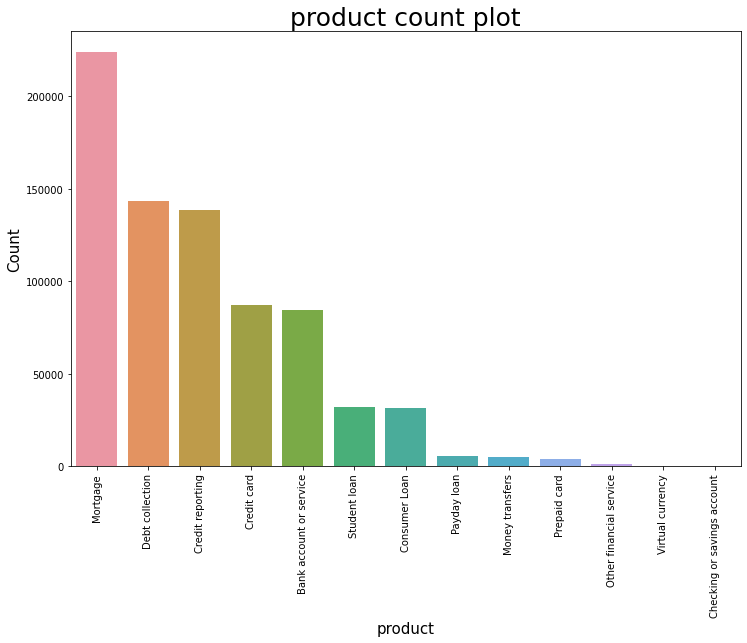

In [81]:
# getting the most complained about product
draw_plots.get_count_plot(df_final, 'product', None, None)

#### Observations:
* The most complained about product is 'Mortgage' followed by 'debt collection' and 'credit reporting' and 'credit card'.
* The least complained about product is 'Checking or savings account'

### 4.1.2 `days_taken`

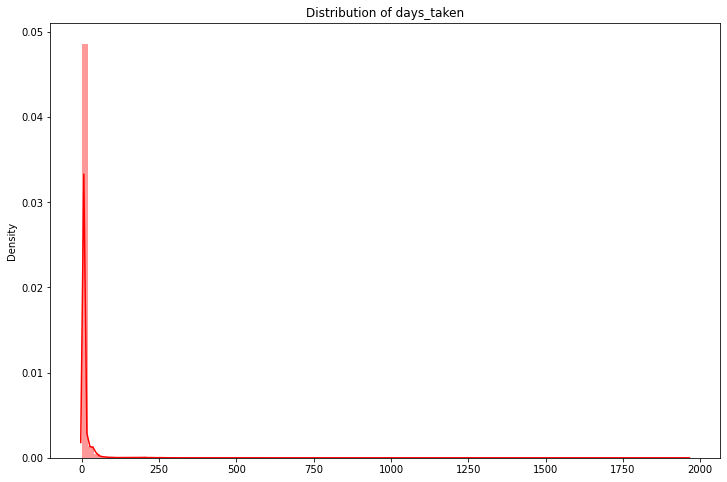

In [82]:
# plotting the distribution of days taken
draw_plots.get_distribution(df_final, 'days_taken')

#### Observations:
* The distribution of `days_taken` is not normal.
* Majority of the complaints were handled in less than 100 days.

### 4.1.3 `company`

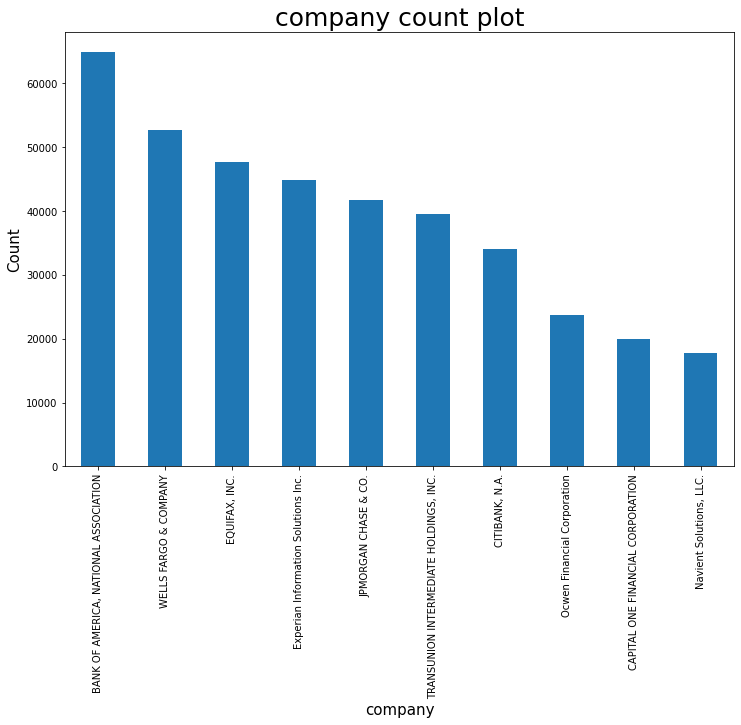

In [83]:
# The top 10 companies with most complaints
draw_plots.get_many_counts(df_final, 'company')

#### Observations:
* The company with the most entries is Bank of America followed by Wells Fargo and Equifax.

### 4.1.4 `financial_service`

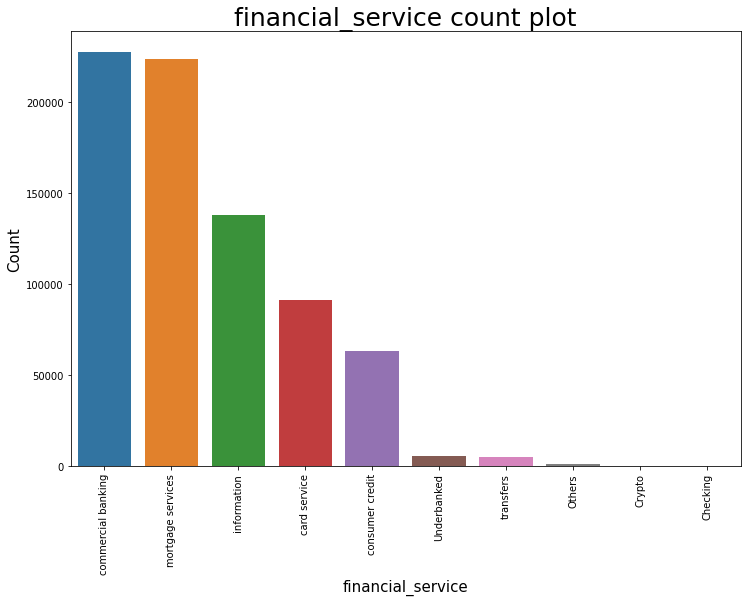

In [86]:
# The most popular financial services
draw_plots.get_count_plot(df_final, 'financial_service', None, None)

#### Observations:
* The most popular service is commercial banking followed by mortgage services.
* The least popular services are Checking and crypto services.

### 4.1.5 `submitted_via`

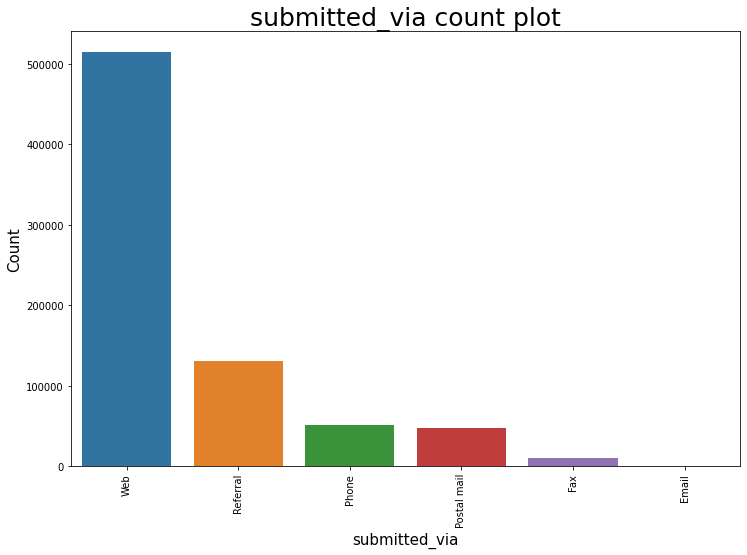

In [90]:
# The most popular method of submission
draw_plots.get_count_plot(df_final, 'submitted_via', None, None)

#### Observations:
* The most popular method of submission is web followed by referral.
* The least popular method of submission is Email.

### 4.1.6 `month_sent`

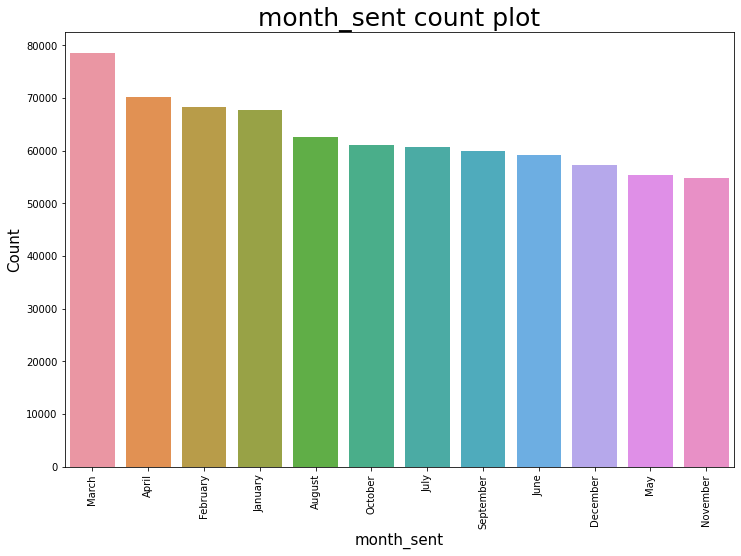

In [95]:
# Months with the most complaints sent by the bureau to the companies
draw_plots.get_count_plot(df_final, 'month_sent', None, None)

#### Observations:
* The month of March, followed by April registers the most complaints sent to the respective financial firms from the Consumer Financial Protection Bureau.
* November is the least popular month for sending out the complaints.

### 4.1.7 `month_received`

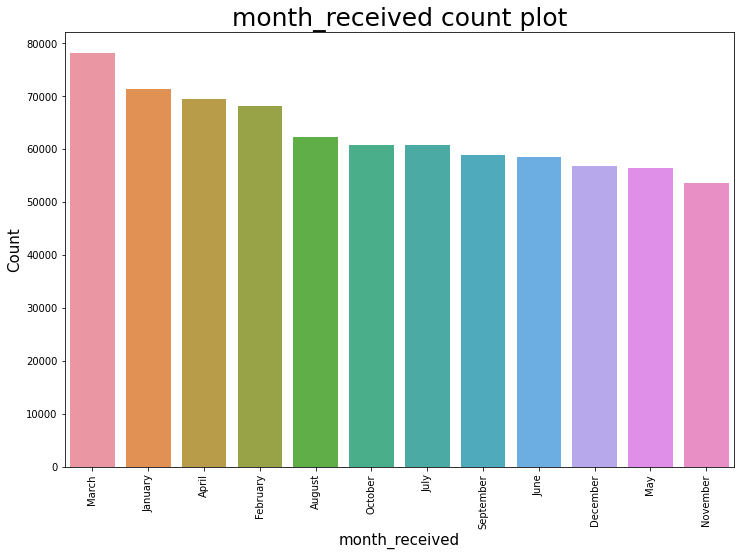

In [96]:
# Months that the consumer financial protection bureau received the complaints
draw_plots.get_count_plot(df_final, 'month_received', None, None)

#### Observations:
* The month of March, followed by January registers the most complaints received from consumers by the Consumer Financial Protection Bureau.
* November is the least popular month for receiving the complaints.

### 4.1.8 year_sent

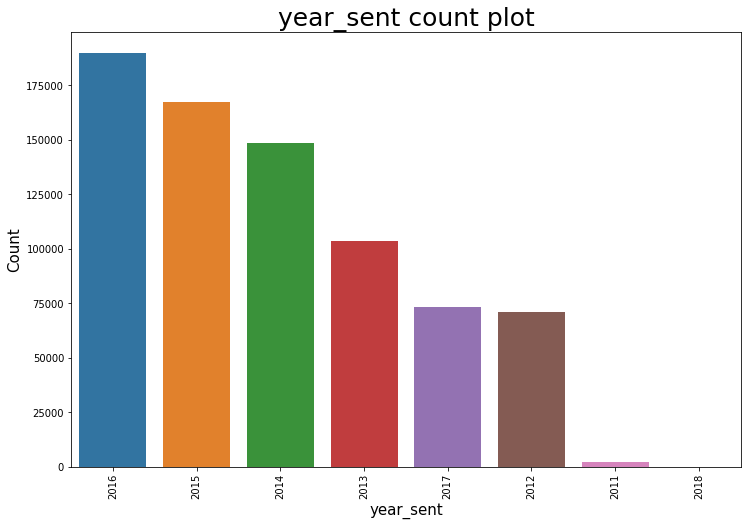

In [97]:
# Trend in the years sent
draw_plots.get_count_plot(df_final, 'year_sent', None, None)

#### Observations:
* The number of complaints sent to companies by the consumer financial protection bureau rise steadily from 2011 to 2016. Then drops afterwards, this may be due to data collection and the fact that data cleaning may have cleaned with it a significant amount of the records.

### 4.1.9 `year_received`

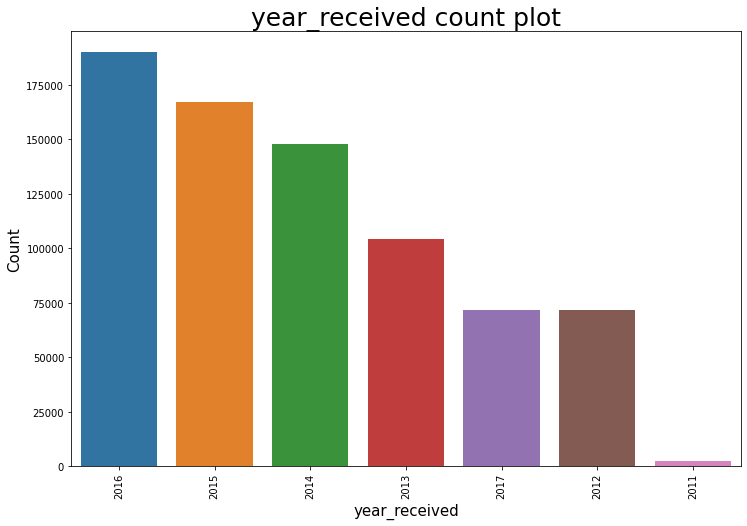

In [98]:
# Trend in the years received
draw_plots.get_count_plot(df_final, 'year_received', None, None)

#### Observations:
* The number of complaints received by the consumer financial protection bureau steadily rise from 2011 to 2016. Then numbers then drop. This may be due to data collection and data cleaning that was done before, this may have taken with it a significant amount of records.

### 4.1.10 `company_response_to_consumer`

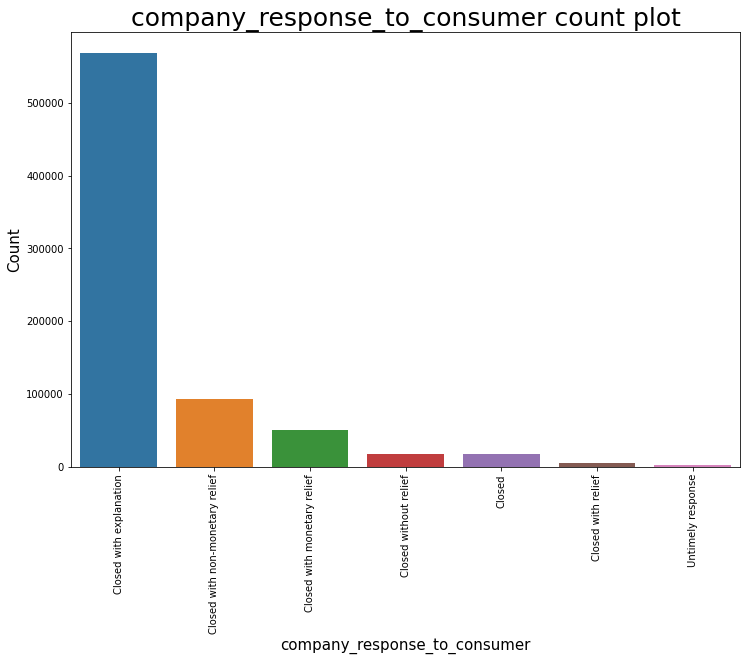

In [99]:
# consumer response to consumer
draw_plots.get_count_plot(df_final, 'company_response_to_consumer', None, None)

#### Observations:
* Most of the complaints are 'closed with an explanation' when a company responds to the consumer.
* Untimely response is the least response given to consumers by companies registered.

### 4.1.11 `timely_response`

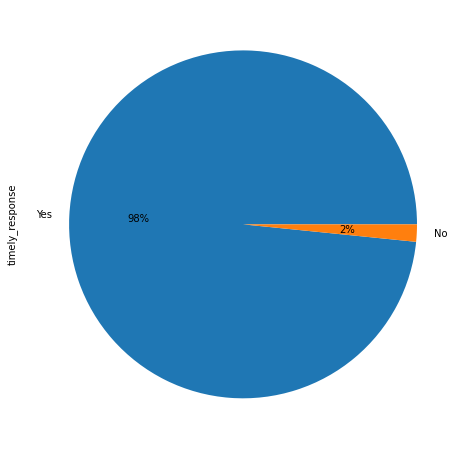

In [100]:
# The distribution of timeliness
draw_plots.get_pie_chart(df_final, 'timely_response')

#### Observations:
* Most responses are timely.

### 4.1.12 `consumer_disputed`

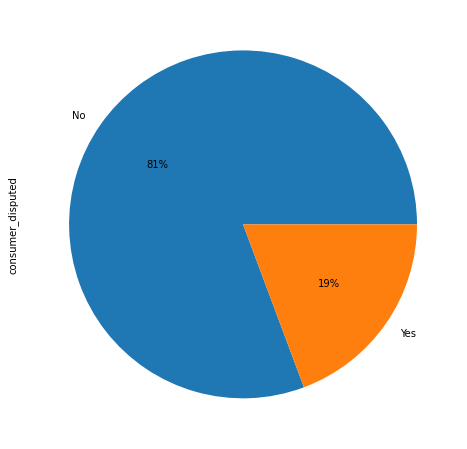

In [101]:
# Do most consumers dispute their responses
draw_plots.get_pie_chart(df_final, 'consumer_disputed')

#### Observations:
* After resolution, most complaints are not disputed.

#### 4.1.1.13 `state`

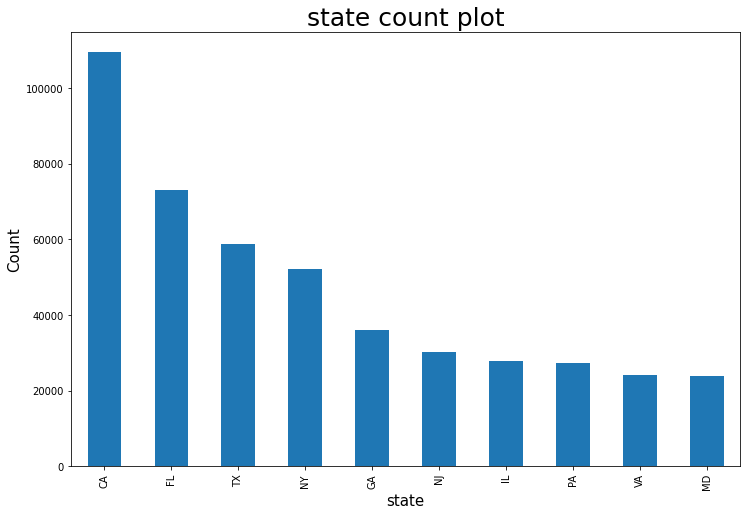

In [102]:
# which states have the most complaints
draw_plots.get_many_counts(df_final, 'state')

#### Observations:
* The state with the the most complaints is 'California' followed by 'Florida' and 'Texas'.

### 4.1.14 `clean_narrative`

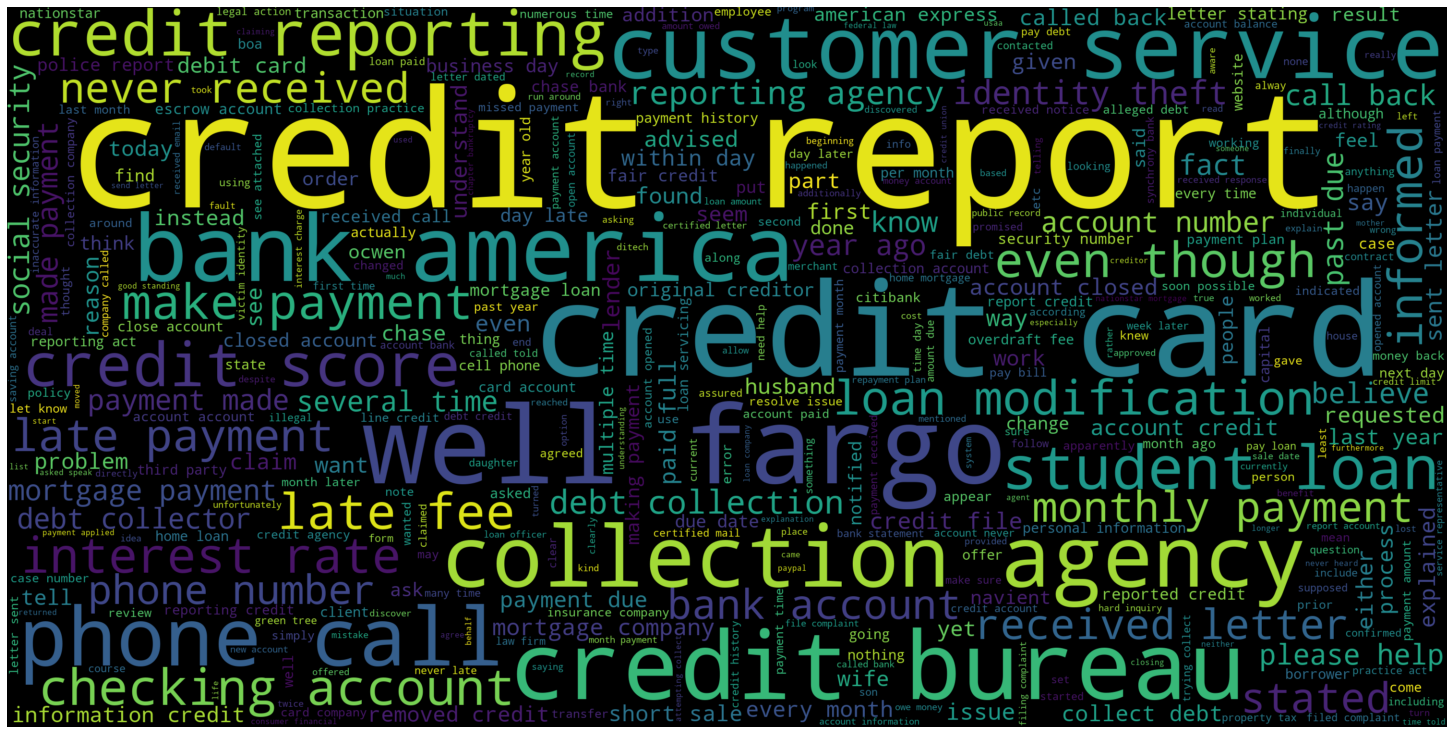

In [103]:
# getting a word cloud
draw_plots.get_word_cloud(df_final, 'clean_narrative')

#### 4.1.15 `issue`

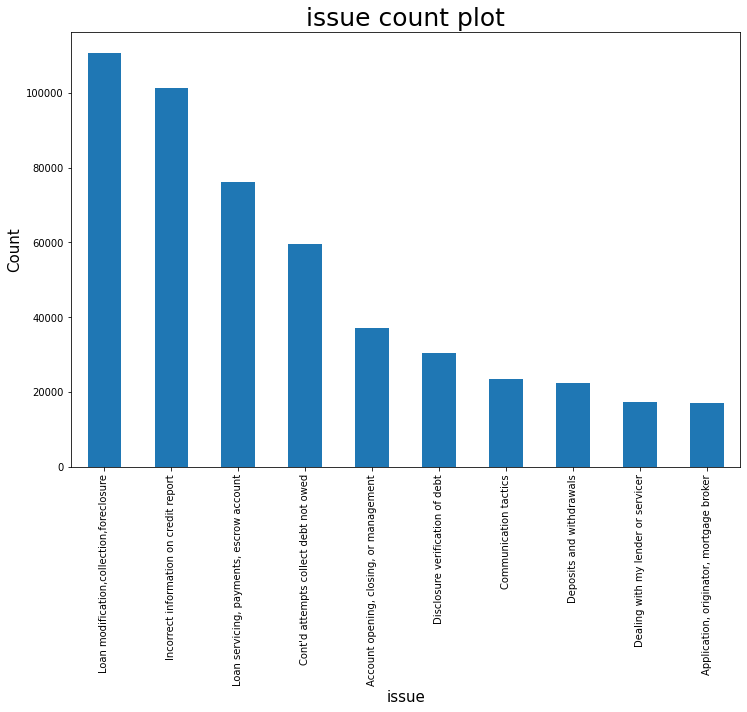

In [104]:
# The top 10 issues in the complaints
draw_plots.get_many_counts(df_final, 'issue')

#### Observations:
* 'Loan modification, collection, foreclosure' is the top issue followed by 'Incorrect information on credit report'

## 4.2 Bivariate Analysis
> In this phase, we shall investigate how one feature varies by influence of another.

### 4.2.1 Variable by `timely_response`
#### 4.2.1.1 `product`

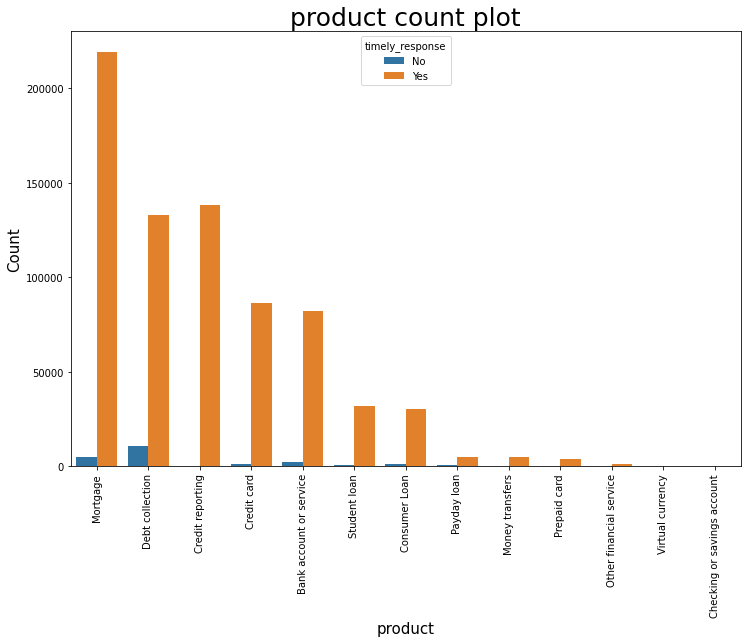

In [105]:
# Product by timely_response
draw_plots.get_count_plot(df_final, 'product', None, 'timely_response')

#### Observations:
* 'Debt collection' has the most non-timely response followed 'Mortgage'.
* 'Checking or savings account` has the least non-timely response.

#### 4.2.1.2 `submitted_via`

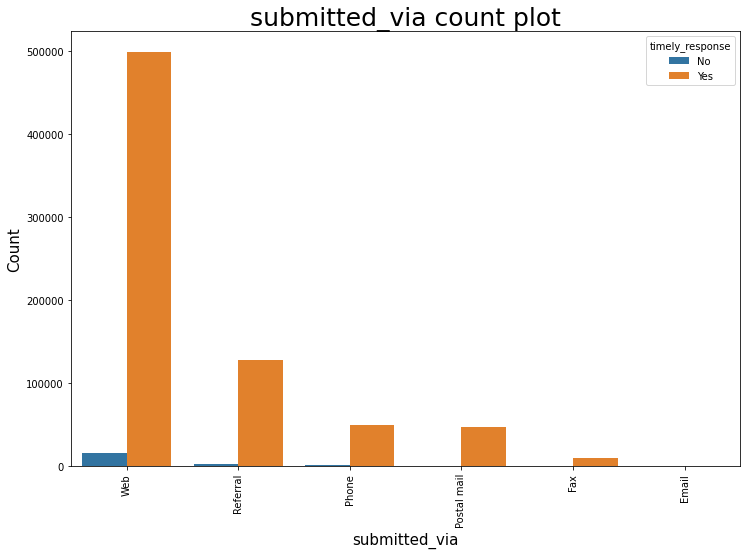

In [106]:
# submitted_via by timely_response
draw_plots.get_count_plot(df_final, 'submitted_via', None, 'timely_response')

#### Observations:
* Submitting through the web will most likely have a non-timely response with comparison with the other methods, this may be due to the fact that is generally the most popular method of submission.

#### 4.2.1.3 `company_response_to_consumer`

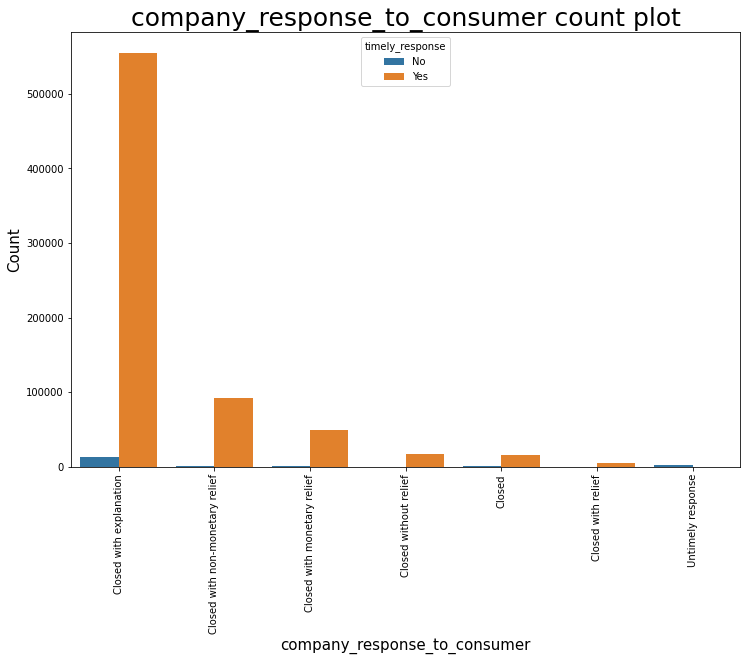

In [107]:
draw_plots.get_count_plot(df_final, 'company_response_to_consumer', None, 'timely_response')

#### Observations:
* 'Closed with explanation' has the most non-timely responses.
* 'Untimely response' has more non-timely responses than timely responses.

#### 4.2.1.4 `consumer_disputed`

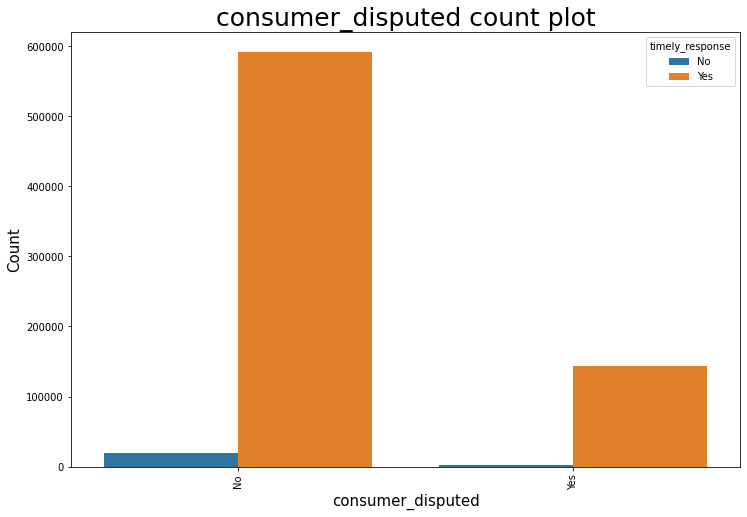

In [108]:
draw_plots.get_count_plot(df_final, 'consumer_disputed', None, 'timely_response')

#### Observations:
* Non-timely responses are mostly found in responses that are not disputed. This may be due to the fact that most responses are not disputed.

#### 4.2.1.5 `days_taken`

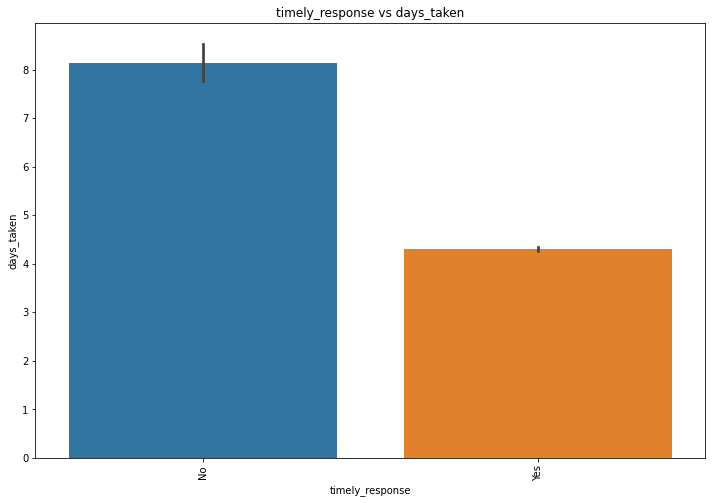

In [109]:
# How many days on average do timely responses take?
draw_plots.get_barplot(df_final, 'timely_response', 'days_taken')

#### Observations:
* Timely responses take an average of 4 days to be dispatched from the consumer financial protection bureau to the respective companies.
* Untimely reponses take an average of 8 days to be dispatched from the consumer financial protection bureau to the respective companies.

### 4.2.2 Variable by `consumer_disputed`

#### 4.2.2.1 `product`

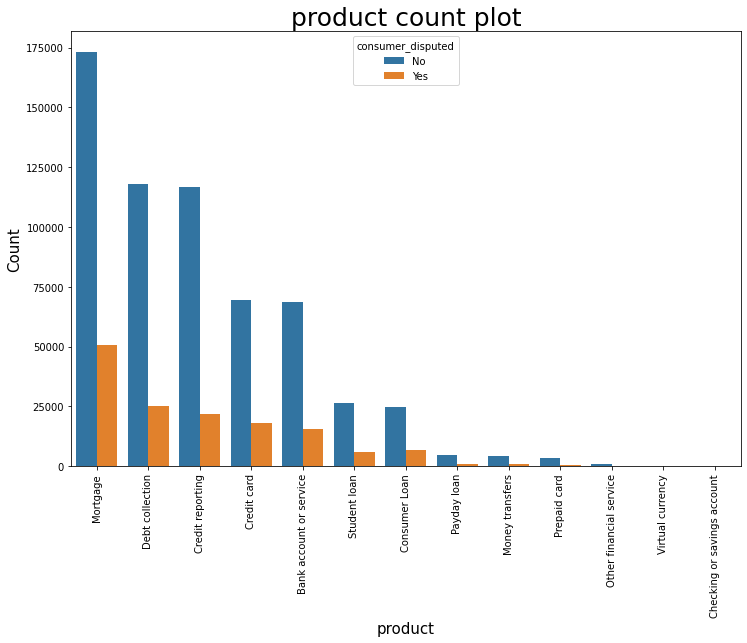

In [110]:
# How is the type of product varied by the feature consumer disputed
draw_plots.get_count_plot(df_final, 'product', None, 'consumer_disputed')

#### Observations:
* Most of the products have fewer disputes than non-disputes.

#### 4.2.2.2 `company_response_to_consumer`

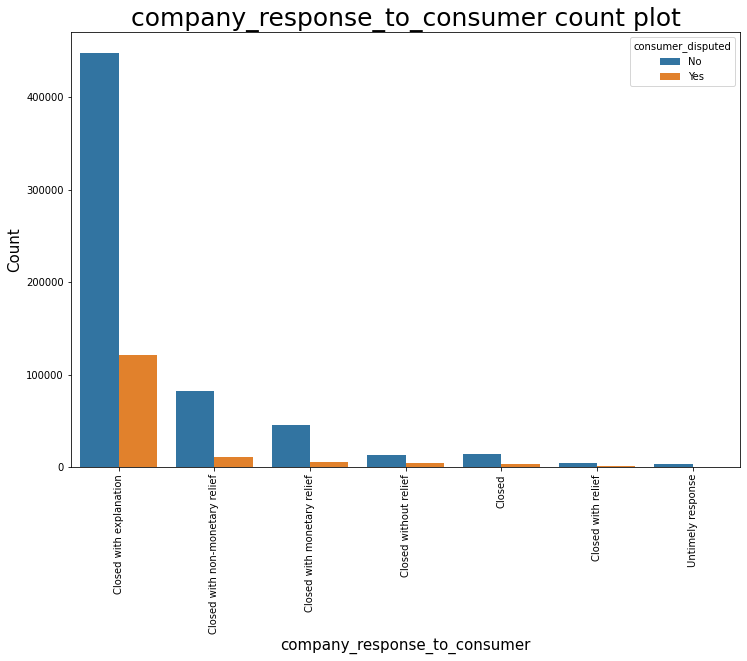

In [111]:
# company_response_to_consumer by consumer disputed
draw_plots.get_count_plot(df_final, 'company_response_to_consumer', None, 'consumer_disputed')

#### 4.2.2.3 `days_taken`

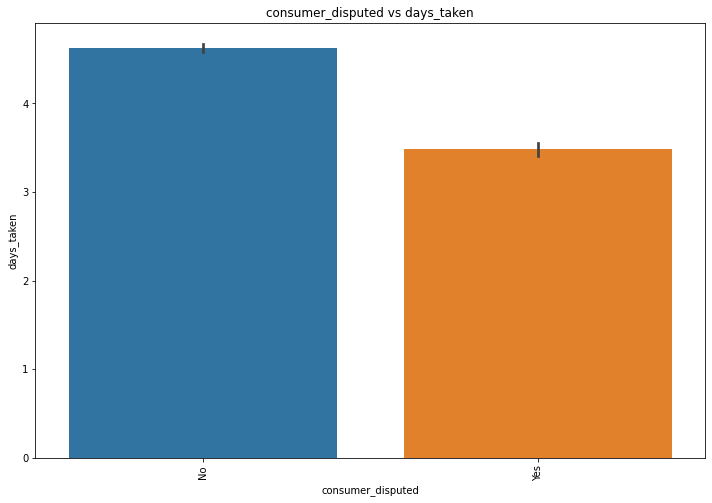

In [112]:
# days_taken by consumer_disputed
draw_plots.get_barplot(df_final, 'consumer_disputed', 'days_taken')

#### Observations:
* On average, the responses that are disputed by the consumers, take between 4 and 5 days to be dispatched by the consumer financial protection bureau to the respective companies.
* On average, the responses that are not disputed by the consumers, take between 3 and 4 days to be dispatched by the consumer financial protection bureau to the respective companies.

In [113]:
df_final.columns

Index(['date_received', 'product', 'issue', 'consumer_complaint_narrative',
       'company', 'state', 'zip_code', 'submitted_via', 'date_sent_to_company',
       'company_response_to_consumer', 'timely_response', 'consumer_disputed',
       'days_taken', 'month_sent', 'month_received', 'year_sent',
       'year_received', 'financial_service', 'clean_narrative'],
      dtype='object')

### 4.2.3 `company_response_to_consumer`

#### 4.2.3.1 `submitted_via`

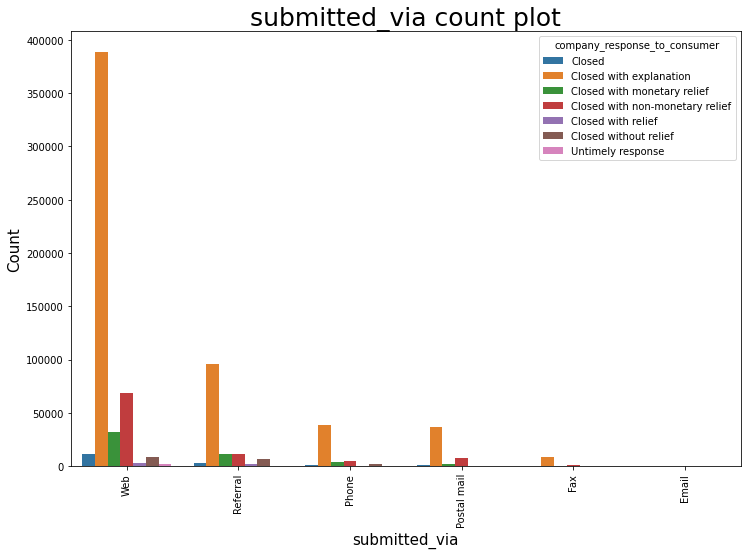

In [114]:
# method of submission by company_response_to_consumer
draw_plots.get_count_plot(df_final, 'submitted_via', None, 'company_response_to_consumer')

#### Observations:
* Most of the methods of submission are dominated by 'closed with explanation' type of consumer response.

#### 4.2.3.2 `timely_response`

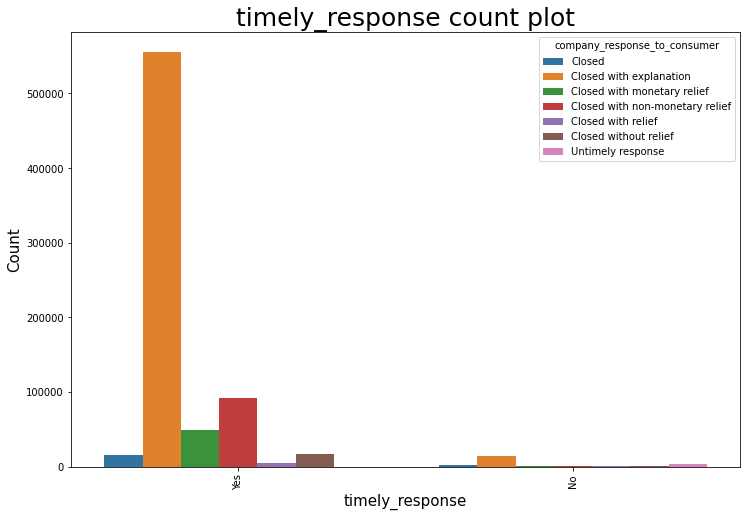

In [115]:
draw_plots.get_count_plot(df_final, 'timely_response', None, 'company_response_to_consumer')

#### Observations:
* Timely responses were mostly 'closed with an explanation'

### 4.2.4 `days_taken`

#### 4.2.4.1 `submitted_via`

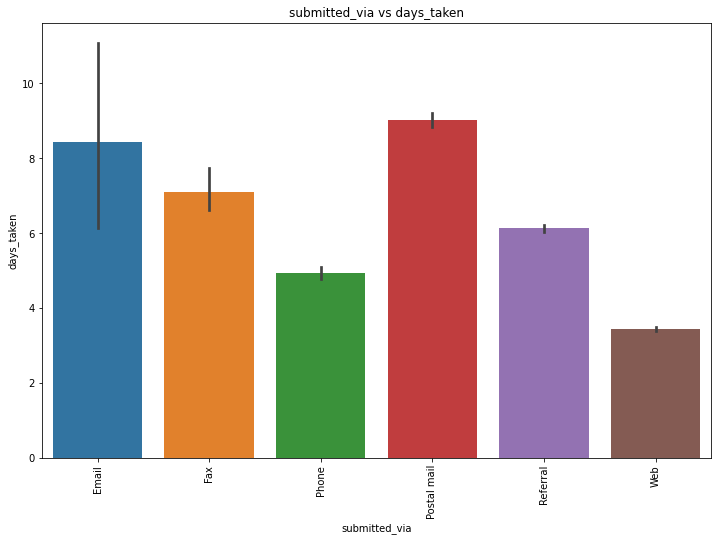

In [116]:
# Why is web popular?
draw_plots.get_barplot(df_final, 'submitted_via', 'days_taken')

#### Observations:
* Complaints that are filed through the web take the least number of days to be dispatched by the consumer financial protection bureau.
* This would explain why web method of submission is popular. 

#### 4.2.4.2 `product`

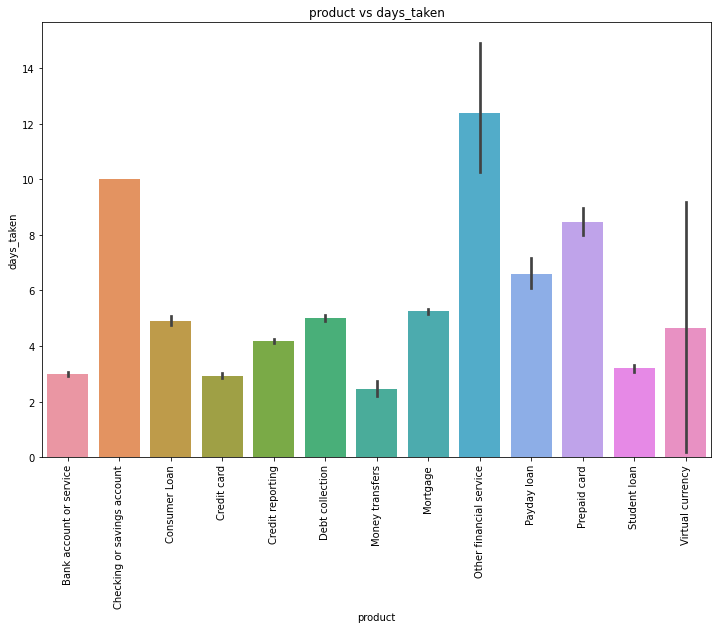

In [117]:
# Is there a preference of products by the bureau?
draw_plots.get_barplot(df_final, 'product', 'days_taken')

#### Observations:
* The product that takes the least number of days to have its complaint dispatched by the consumer financial protection bureau is 'money transfers' and 'other financial service' takes the most days to have complaints dispatched.

# 5 Modelling
> In this phase, we create predictive machine learning models.

## 5.1 Preprocess the data for modelling

In [124]:
df_final.columns

Index(['index', 'date_received', 'product', 'issue',
       'consumer_complaint_narrative', 'company', 'state', 'zip_code',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'days_taken', 'month_sent',
       'month_received', 'year_sent', 'year_received', 'financial_service',
       'clean_narrative'],
      dtype='object')

In [170]:
# splitting the data into target and feature variables
X = df_final[['product', 'issue', 'submitted_via']]
y = df_final[['company_response_to_consumer', 'consumer_disputed', 'timely_response']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5.1.1 Encoding

In [171]:
# One hot encoding the predictor variables
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

# Fitting and transforming the train set
X_train  = ohe.fit_transform(X_train)

# # transforming the test set
X_test = ohe.transform(X_test)

In [172]:
## Label Encoding the target variables
m_ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
# Fitting and transforming the train set
y_train = m_ohe.fit_transform(y_train)

# Transforming the test set
y_test = m_ohe.transform(y_test)

In [ ]:
from sklearn.utils import shuffle
X_trial, y1 = make_classification(n_samples=10, n_features=100,
                            n_informative=30, n_classes=3,
                             random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y_trial = np.vstack((y1, y2, y3)).T

In [177]:
forest = RandomForestClassifier(random_state=42)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

In [180]:
train_preds = multi_target_forest.predict(X_train)

In [181]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

In [182]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, auc, RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [188]:
acc_score = accuracy_score(y_train, train_preds)

In [189]:
acc_score

0.5710343054599896